In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
plt.rc('font', family = font_name)

from sklearn.mixture import GaussianMixture

# data 처리

In [19]:
data = pd.read_csv("data/분석용_데이터/clustering_final(cp949).csv", encoding = "cp949")
data.head()

,구,행정동,독거노인,연립다세대_매매,연립다세대_전월세,아파트_매매,아파트_전월세,단독다가구_매매,단독다가구_전월세
0,종로구,사직동,439,658.951346,414.007713,1002.930454,479.008604,893.404747,385.713580
1,종로구,삼청동,167,441.153301,330.288235,0.000000,342.779517,748.753412,330.271380
2,종로구,부암동,346,508.474576,336.686423,504.896994,339.217722,444.702516,309.176750
3,종로구,평창동,640,546.834313,373.015873,633.650158,323.635888,417.301825,277.961668
4,종로구,무악동,265,652.413624,366.351374,1065.000000,279.069767,670.076330,267.441860


In [20]:
# 매매 와 전월세로 column 축소
data["매매"] = data[["연립다세대_매매", "아파트_매매", "단독다가구_매매"]].mean(axis = 1)
data["전월세"] = data[["연립다세대_전월세", "아파트_전월세", "단독다가구_전월세"]].mean(axis = 1)
data.head()

,구,행정동,독거노인,연립다세대_매매,연립다세대_전월세,아파트_매매,아파트_전월세,단독다가구_매매,단독다가구_전월세,매매,전월세
0,종로구,사직동,439,658.951346,414.007713,1002.930454,479.008604,893.404747,385.713580,851.762182,426.243299
1,종로구,삼청동,167,441.153301,330.288235,0.000000,342.779517,748.753412,330.271380,396.635571,334.446377
2,종로구,부암동,346,508.474576,336.686423,504.896994,339.217722,444.702516,309.176750,486.024695,328.360298
3,종로구,평창동,640,546.834313,373.015873,633.650158,323.635888,417.301825,277.961668,532.595432,324.871143
4,종로구,무악동,265,652.413624,366.351374,1065.000000,279.069767,670.076330,267.441860,795.829985,304.287667


In [21]:
# 필요있는 column만 남기기
data = data[["구", '행정동', '독거노인', '매매', '전월세']]
data.head()

,구,행정동,독거노인,매매,전월세
0,종로구,사직동,439,851.762182,426.243299
1,종로구,삼청동,167,396.635571,334.446377
2,종로구,부암동,346,486.024695,328.360298
3,종로구,평창동,640,532.595432,324.871143
4,종로구,무악동,265,795.829985,304.287667


In [22]:
data.to_csv("data/분석용_데이터/clustering_final_2(cp949).csv", encoding = "cp949", index = False)

# Clustering

- 다양한 클러스터링을 접해보고 가장 적절했던 GMM만 남김

In [ ]:
data = pd.read_csv("data/분석용_데이터/clustering_final_2(cp949).csv", encoding = "cp949")
data.head()

In [23]:
gmm = GaussianMixture(n_components=3, random_state=0).fit(data.iloc[:, -3:])
gmm_cluster_labels = gmm.predict(data.iloc[:, -3:])
data['gmm_cluster'] = gmm_cluster_labels
data['gmm_cluster'].value_counts()

0    267
2    130
1     27
Name: gmm_cluster, dtype: int64

### 시각화
- 2D

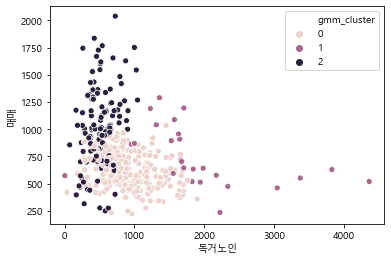

In [24]:
sns.scatterplot(x = "독거노인", y = "매매", hue="gmm_cluster", data = data)

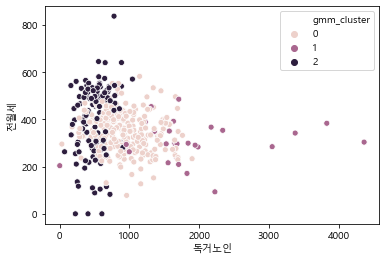

In [25]:
sns.scatterplot(x = "독거노인", y = "전월세", hue="gmm_cluster", data = data)

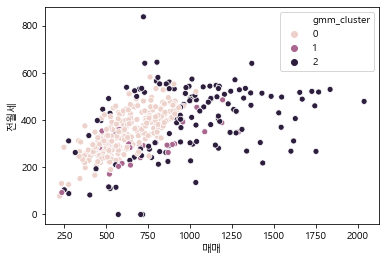

In [27]:
sns.scatterplot(x = "매매", y = "전월세", hue="gmm_cluster", data = data)

- 3D

<IPython.core.display.Javascript object>


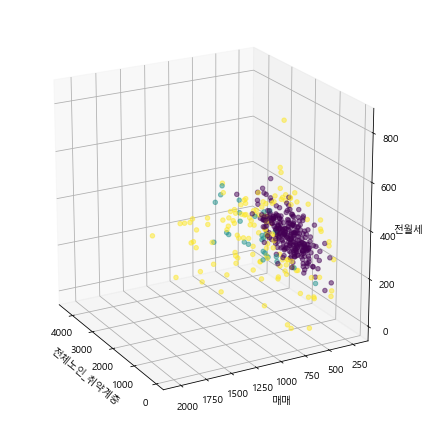

In [32]:
import matplotlib.animation as ani

def rotate(angle):
    ax.view_init(azim=angle)

%matplotlib notebook
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=134)
ax.scatter(data["독거노인"],data["매매"],data["전월세"],c=data['gmm_cluster'],alpha=0.5)
ax.set_xlabel('전체노인_취약계층')
ax.set_ylabel('매매')
ax.set_zlabel('전월세')
plt.show()
animate = ani.FuncAnimation(fig, rotate, frames=np.arange(0, 360, 1), interval=50)
animate.save('clustering.gif', writer=ani.PillowWriter(fps=20))

In [33]:
data.to_csv("data/분석용_데이터/clustering_result_gmm(cp949).csv", encoding = "cp949", index = False)